In [1]:
import pandas as pd
df=pd.read_csv('c:/data/titanic/data.csv')
df.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [2]:
cols=['sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male',
'alone', 'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B','deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C','embarked_Q', 'embarked_S']
X=df[cols]
y=df['survived']
y.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [3]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2['survived'].value_counts()


0    342
1    342
Name: survived, dtype: int64

In [4]:
X=df2[cols]
y=df2['survived']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=0)


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)


In [15]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=500,random_state=0)
logit.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, random_state=0)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [10]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=0,max_iter=1000)
ann.fit(X_train_scaled, y_train)


MLPClassifier(max_iter=1000, random_state=0)

In [11]:
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(X_train_scaled, y_train)


SVC(random_state=0)

c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class meth

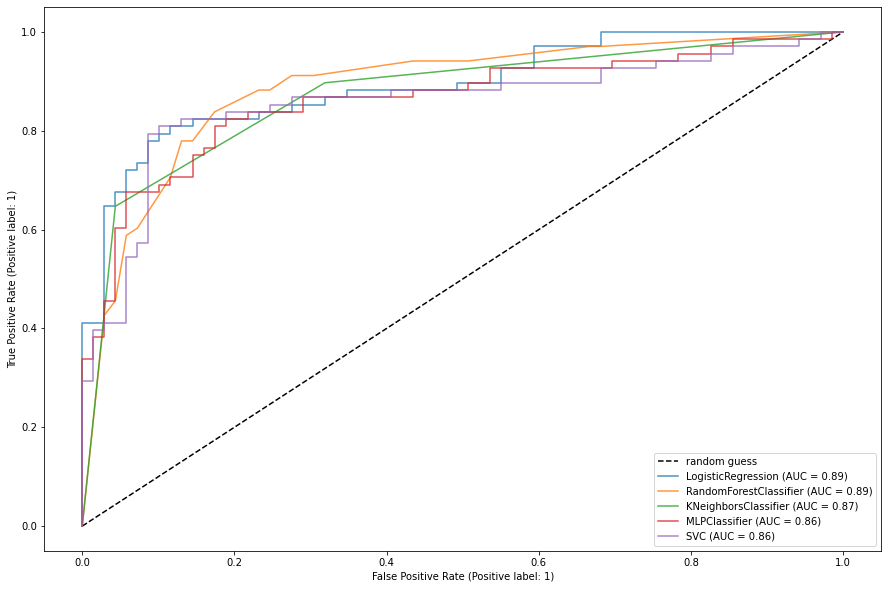

In [12]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
ax = plt.gca()
plot_roc_curve(logit, X_test_scaled, y_test, ax=ax, alpha=0.8)
plot_roc_curve(rf, X_test_scaled, y_test, ax=ax, alpha=0.8)
plot_roc_curve(knn, X_test_scaled, y_test, ax=ax, alpha=0.8)
plot_roc_curve(ann, X_test_scaled, y_test, ax=ax, alpha=0.8)
plot_roc_curve(svm, X_test_scaled, y_test, ax=ax, alpha=0.8)

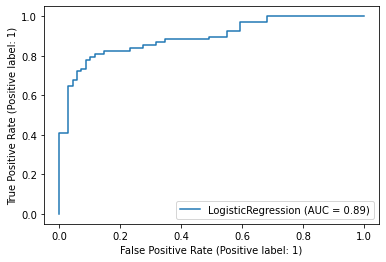

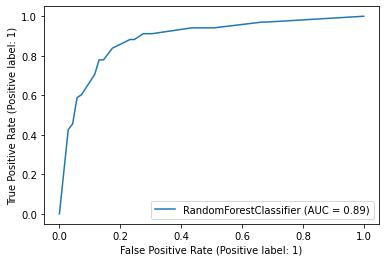

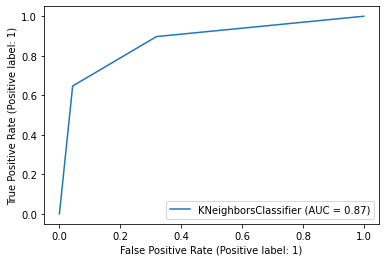

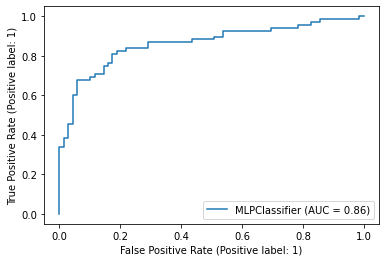

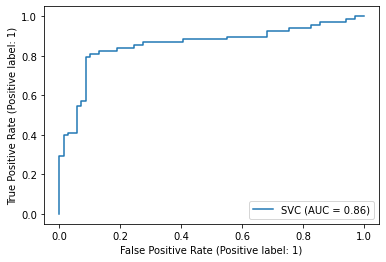

In [17]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logit, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(rf, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(ann, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)